# Describe data

We use the iris dataset for create a classifier for indentify the class of flower. Firstly, we use the Kmeans for create some clusters and identify the species of flowers. After, we will use the target provided by dataset and compare the results.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
data.rename({'sepal length (cm)': 'sepal_length', 
           'sepal width (cm)': 'sepal_width', 
           'petal length (cm)': 'petal_length', 
           'petal width (cm)': 'petal_width'}, 
          axis=1, inplace=True)

In [5]:
df = data.copy()

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

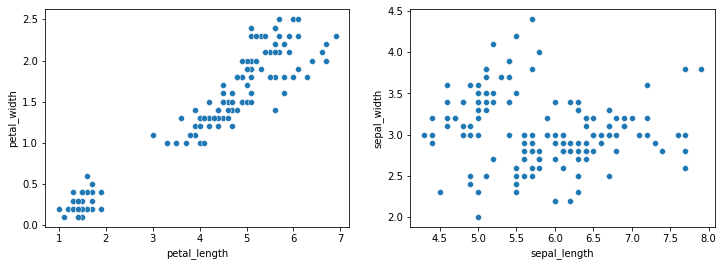

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=df, x='petal_length', y='petal_width', ax=axes[0]);
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', ax=axes[1]);

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2)

## KMeans

In [10]:
from sklearn.cluster import KMeans

k = 3

cluster = KMeans(n_clusters = k)

y_pred = cluster.fit_predict(df_train)

y_pred

array([1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1,
       1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2,
       0, 2, 0, 1, 2, 2, 2, 2, 1, 0], dtype=int32)

In [11]:
df_train['target'] = y_pred

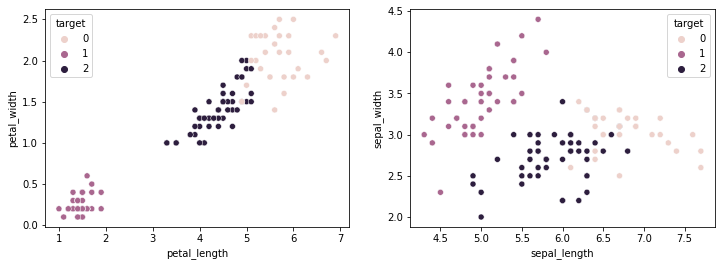

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=df_train, x='petal_length', y='petal_width', hue='target', ax=axes[0]);
sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', ax=axes[1]);

In [13]:
k_list = list(range(2, 11))
inertia_list = []

for k in k_list:    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_train)
    inertia = kmeans.inertia_
    inertia_list.append(inertia)
    
print(k_list, inertia_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10] [186.20122877431305, 58.35770664423886, 44.70943804520505, 36.62138796310324, 30.02861167416975, 26.877665266106444, 23.6949359763044, 21.65176556776557, 20.084375745169865]


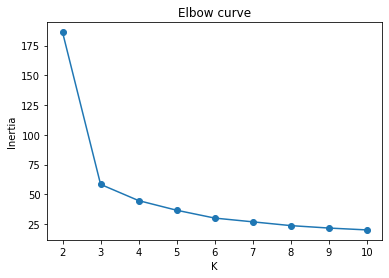

In [14]:
plt.plot(k_list, inertia_list)
plt.scatter(k_list, inertia_list)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow curve');

The elbow curve show that the best value of K is 3. That is obviously, according the iris dataset.

# Classifier

We will use the decision tree algorith for make the classifier for this dataset.

In [15]:
x_train = df_train.drop('target', axis=1)
y_train = df_train['target']

In [16]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_train

array([1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1,
       1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2,
       0, 2, 0, 1, 2, 2, 2, 2, 1, 0], dtype=int32)

In [17]:
from sklearn import metrics

print('acc train:', round(metrics.accuracy_score(y_train, y_pred_train), 3))

acc train: 1.0


**The results sugest that exist on overfitting in the model. We can change the max_depth of tree for avoid this behaviour**

## Cross validation

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, x_train, y_train, cv=5, scoring='accuracy')

In [19]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', round(scores.mean(), 3))
    print('Std:', round(scores.std(), 3))

In [20]:
display_scores(scores)

Scores: [0.75       1.         1.         1.         0.91666667]
Mean: 0.933
Std: 0.097


## Change the depth of tree

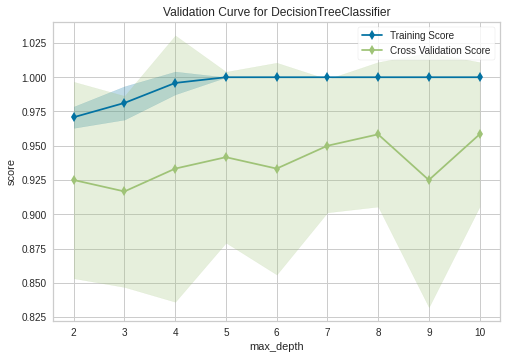

In [21]:
param_range = list(range(2, 11))

from yellowbrick.model_selection import ValidationCurve

val_curve = ValidationCurve(classifier, param_name='max_depth', scoring='accuracy', param_range=param_range, cv=5)
val_curve.fit(x_train, y_train)
val_curve.poof();

The best value of max_depth is 2.

## New Classifier

In [22]:
classifier_v1 = DecisionTreeClassifier(max_depth=2)

classifier_v1.fit(x_train, y_train)

y_pred_train_v1 = classifier_v1.predict(x_train)

In [23]:
from sklearn import metrics

print('Auc train:', round(metrics.accuracy_score(y_train, y_pred_train_v1), 3))

Auc train: 0.967


## Cross validation

In [24]:
from sklearn.model_selection import cross_val_score

scores_v1 = cross_val_score(classifier_v1, x_train, y_train, cv=5, scoring='accuracy')

In [25]:
display_scores(scores_v1)

Scores: [0.79166667 0.95833333 1.         0.95833333 0.91666667]
Mean: 0.925
Std: 0.072


# Training model with the original target (without kmeans)

In [26]:
df2 = data.copy()

In [27]:
df2['target'] = iris.target

In [28]:
x2 = df2.drop('target', axis=1)
y2 = df2['target']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)

In [29]:
classifier_v2 = DecisionTreeClassifier(max_depth=2)

classifier_v2.fit(x2_train, y2_train)

y_pred_train_v2 = classifier_v2.predict(x2_train)

In [30]:
from sklearn import metrics

print('Auc train:', round(metrics.accuracy_score(y2_train, y_pred_train_v2), 3))

Auc train: 0.967


## Cross validation

In [31]:
scores_v2 = cross_val_score(classifier_v2, x2_train, y2_train, cv=5, scoring='accuracy')

In [32]:
display_scores(scores_v2)

Scores: [0.95833333 0.95833333 0.875      0.91666667 0.95833333]
Mean: 0.933
Std: 0.033


# Results

In [33]:
results = {'model': ['tree', 'tree (max_depth=2)', 'tree (max_depth=2)'], 
           'type': ['kmeans', 'kmeans', 'original'], 
          'mean scores': [scores.mean(), scores_v1.mean(), scores_v2.mean()],
          'std scores': [scores.std(), scores_v1.std(), scores_v2.std()]}

results_data = pd.DataFrame(results)
results_data

,model,type,mean scores,std scores
0,tree,kmeans,0.933333,0.097183
1,tree (max_depth=2),kmeans,0.925000,0.071686
2,tree (max_depth=2),original,0.933333,0.033333


The classifier with kmeans have the good performance when compared with the classifier with original data. The mean of kmeans score is practically the same of the original data, but, the difference is on the standard deviation. This table shows that the kmeans algorith is one very good approach for segmentation of data in clusters.

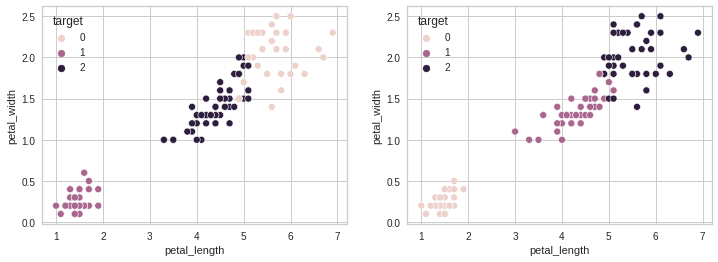

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=df_train, x='petal_length', y='petal_width', hue='target', ax=axes[0])
sns.scatterplot(data=x2_train, x='petal_length', y='petal_width', hue=y2_train, ax=axes[1]);

The first graph was plotted with data with kmeans algorith, while the second graph was plotted with the original data. This is other evidence that the kmeans clusterings has a good performance of create a separation of data.